# Homework 7

Analyze `trace2` signals (note that these are signals different
from the `trace1` electrode we have been analysing up to now). First remove the
slow baseline fluctuations by subtracting a smoothed version of the signal, as
in the previous homework. Find the spikes by thresholding the signal: extract
the waveforms extending 29 timebins before and 30 timebins after the spike and
represent them as 60-dimensional vectors. By looking at these samples, do you
think signals on the `trace2` electrode come from an individual neuron (compare
with the analysis in Fig 26)? Compute the covariance matrix of samples and
do PCA. Project the samples onto the first two principal components and show
all spike samples as points on the plane (let’s denote the first projection by $y_1$
and second by $y_2$). Can you clearly define clusters of spikes in this plane? How
many spikes would you assign to each cluster? Plot the mean spike shape in each
cluster. How would you find a direction vector in the ($y_1$ , $y_2$) plane that best
separates spikes from first vs second cluster (in other words, can you find a linear
combination of $y_1$ and $y_2$ , i.e., $z = Ay_1 + By_2$ for some coefficients $A$ and $B$, such
that $z$ values for waveforms from the first cluster cleanly separate from $z$ values
for waveforms from the second cluster, e.g., by means of a threshold on $z$)? Do
you know how to visualize this direction vector (or the linear combination) as a
waveform in the original, 60-dimensional space?

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
trace2 = np.loadtxt('trace2.txt')

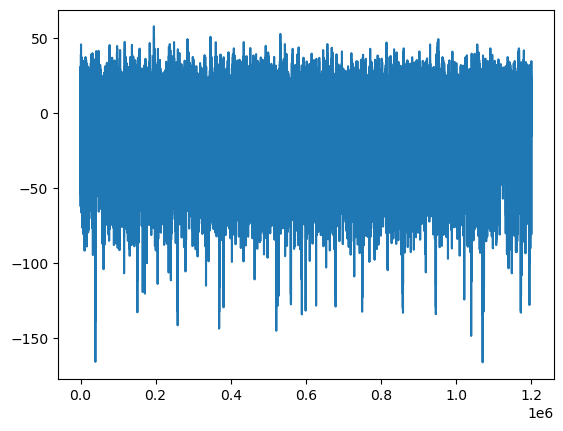

In [10]:
plt.plot(trace2)
plt.show()

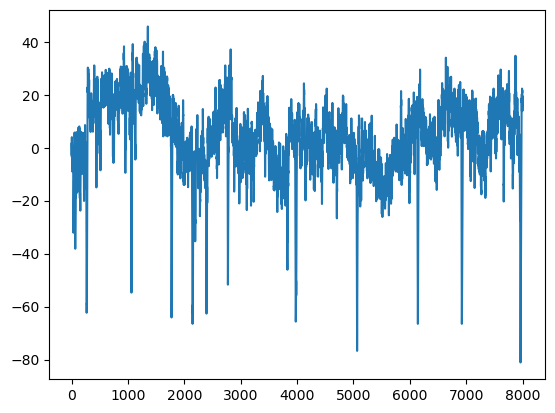

In [97]:
# Plot a subset of the trace
plt.plot(trace2[:8000])
plt.show()

## Subtract the baseline
Define a new time series, $\tilde{x}(t)$, such that each value of $\tilde{x}(t)$ corresponds to a moving average of the original time series, e.g.,
$$ 
\frac{1}{T} \sum_{t' = t-T/2+1}^{t+T/2} x(t')
$$

In [94]:
# Subtract the baseline

# First plot the baseline
T = 100 # time points for sliding window
baseline = np.zeros(len(trace2))



def baseline(trace, T):
    baseline = np.zeros(len(trace))
    for t in range(len(trace)): # iterate over each trace element
        t_lower = int(t-T/2+1) # find the lower bound of the sliding window
        t_upper = int(t+T/2) # find the upper bound of the sliding window
        sum_ts = 0 # sum all the ts in the range
        counts = 0 # count the positive indices in the range
        for t_index in range(t_lower, t_upper+1): # iterate over each element of the window; if it's positive, sum it. Then divide by the total elements.
            if t_index>=0 and t_index<len(trace):
                sum_ts = sum_ts + trace[t_index]
                counts = counts + 1
        if counts>0:
            baseline[t] = sum_ts / counts
        
    return baseline

baseline = baseline(trace2, T)
    
print(baseline)

[-8.95098431 -8.72675    -8.45396226 ...  9.97113846  9.86426667
  9.803136  ]


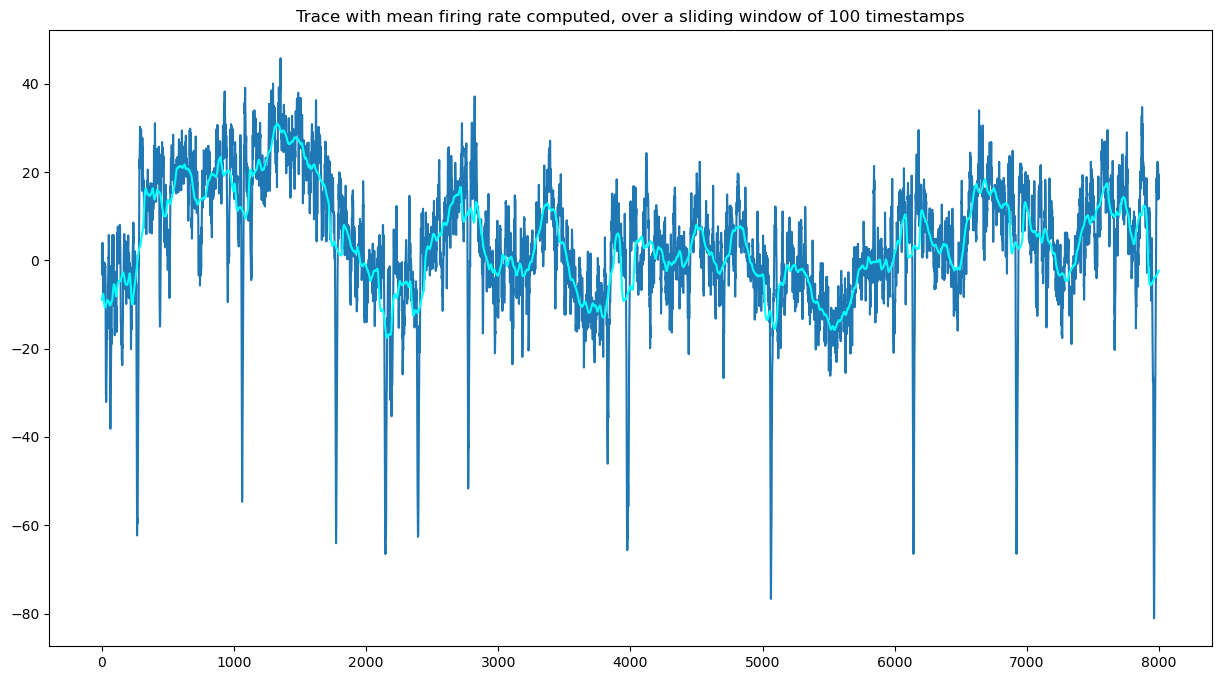

In [108]:
plt.figure(figsize=(15,8))
plt.title(f'Trace with mean firing rate computed, over a sliding window of {T} timestamps')
plt.plot(trace2[:8000])
plt.plot(baseline[:8000], color='cyan')
plt.show()

In [109]:
trace2_meansub  = trace2 - baseline

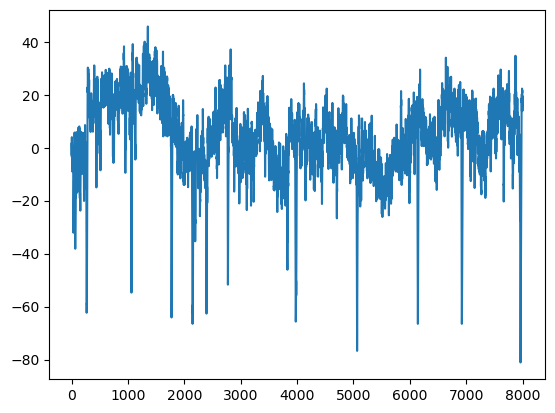

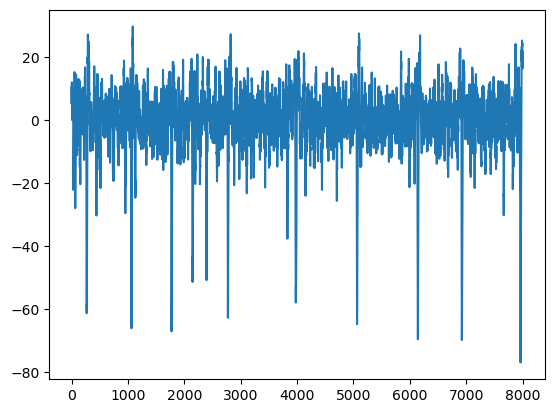

In [119]:
plt.plot(trace2[:8000])
plt.show()
plt.plot(trace2_meansub[:8000])
plt.show()